<a href="https://colab.research.google.com/github/TristanDelgado/Notebooks/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

Every training round is called an "Epoch"

In [1]:
# Loading the MNIST Dataset
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)

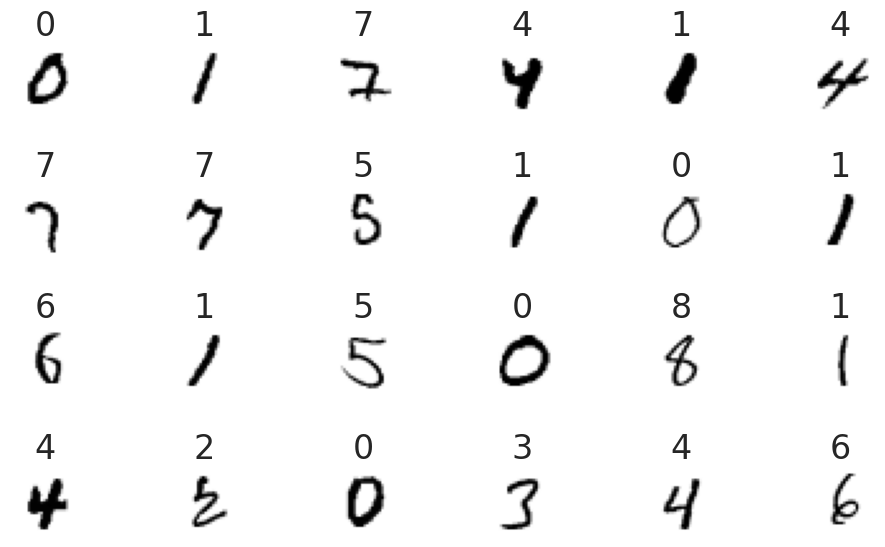

In [4]:
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(10, 6))

for item in zip(axes.ravel(), X_train[index], y_train[index]):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()

Neural networks require the shape of the data to be a certain way as the neural network with add many layers to the data as it learns how to interpret the data.

In [5]:
# The following code is getting the data into an acceptable form
X_train = X_train.reshape((60000, 28, 28, 1))
# print(f"X_train: {X_train}")

X_test = X_test.reshape((10000, 28, 28, 1))
# print(f"X_test: {X_test}")

In [6]:
# Next we will use one-hot encoding to categorize each of the numbers into
# a format our neural network will be able to understand
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(f"y_train shape: {y_train.shape}")
print(f"y_train[0]: {y_train[0]}")

y_test = to_categorical(y_test)

y_train shape: (60000, 10)
y_train[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [7]:
# Now we create the neural network
from tensorflow.keras.models import Sequential
cnn = Sequential()

In [8]:
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

In [9]:
# Convolution Layer which uses the relationships between pixels that are close to
# one another to learn useful features (or patterns) in small areas of each sample.
# These features become inputs to subsequent layers.

cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
                     input_shape=(28, 28, 1)))


'''
The Conv2D layer is configured with the following arguments:

filters=64—The number of filters in the resulting feature map.

kernel_size=(3, 3)—The size of the kernel used in each filter.

activation='relu'—The 'relu' (Rectified Linear Unit) activation function is used to produce this layer’s output.

'''

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


"\nThe Conv2D layer is configured with the following arguments:\n\nfilters=64—The number of filters in the resulting feature map.\n\nkernel_size=(3, 3)—The size of the kernel used in each filter.\n\nactivation='relu'—The 'relu' (Rectified Linear Unit) activation function is used to produce this layer’s output.\n\n"

In [10]:
# Next we'll add a "pooling layer" which takes a set number of pixles, finds the largest
# feature and keeps only the largest feature

cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [11]:
# Adding another layer
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

In [12]:
cnn.add(Flatten())

In [13]:
# Adds the "neurons" of a neural network
cnn.add(Dense(units=128, activation='relu'))

In [14]:
# Adding the final layer
# This is the decision layer, it converts the values into classification values
cnn.add(Dense(units=10, activation='softmax'))

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         409,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 485,514 (1.85 MB)

 Trainable params: 485,514 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

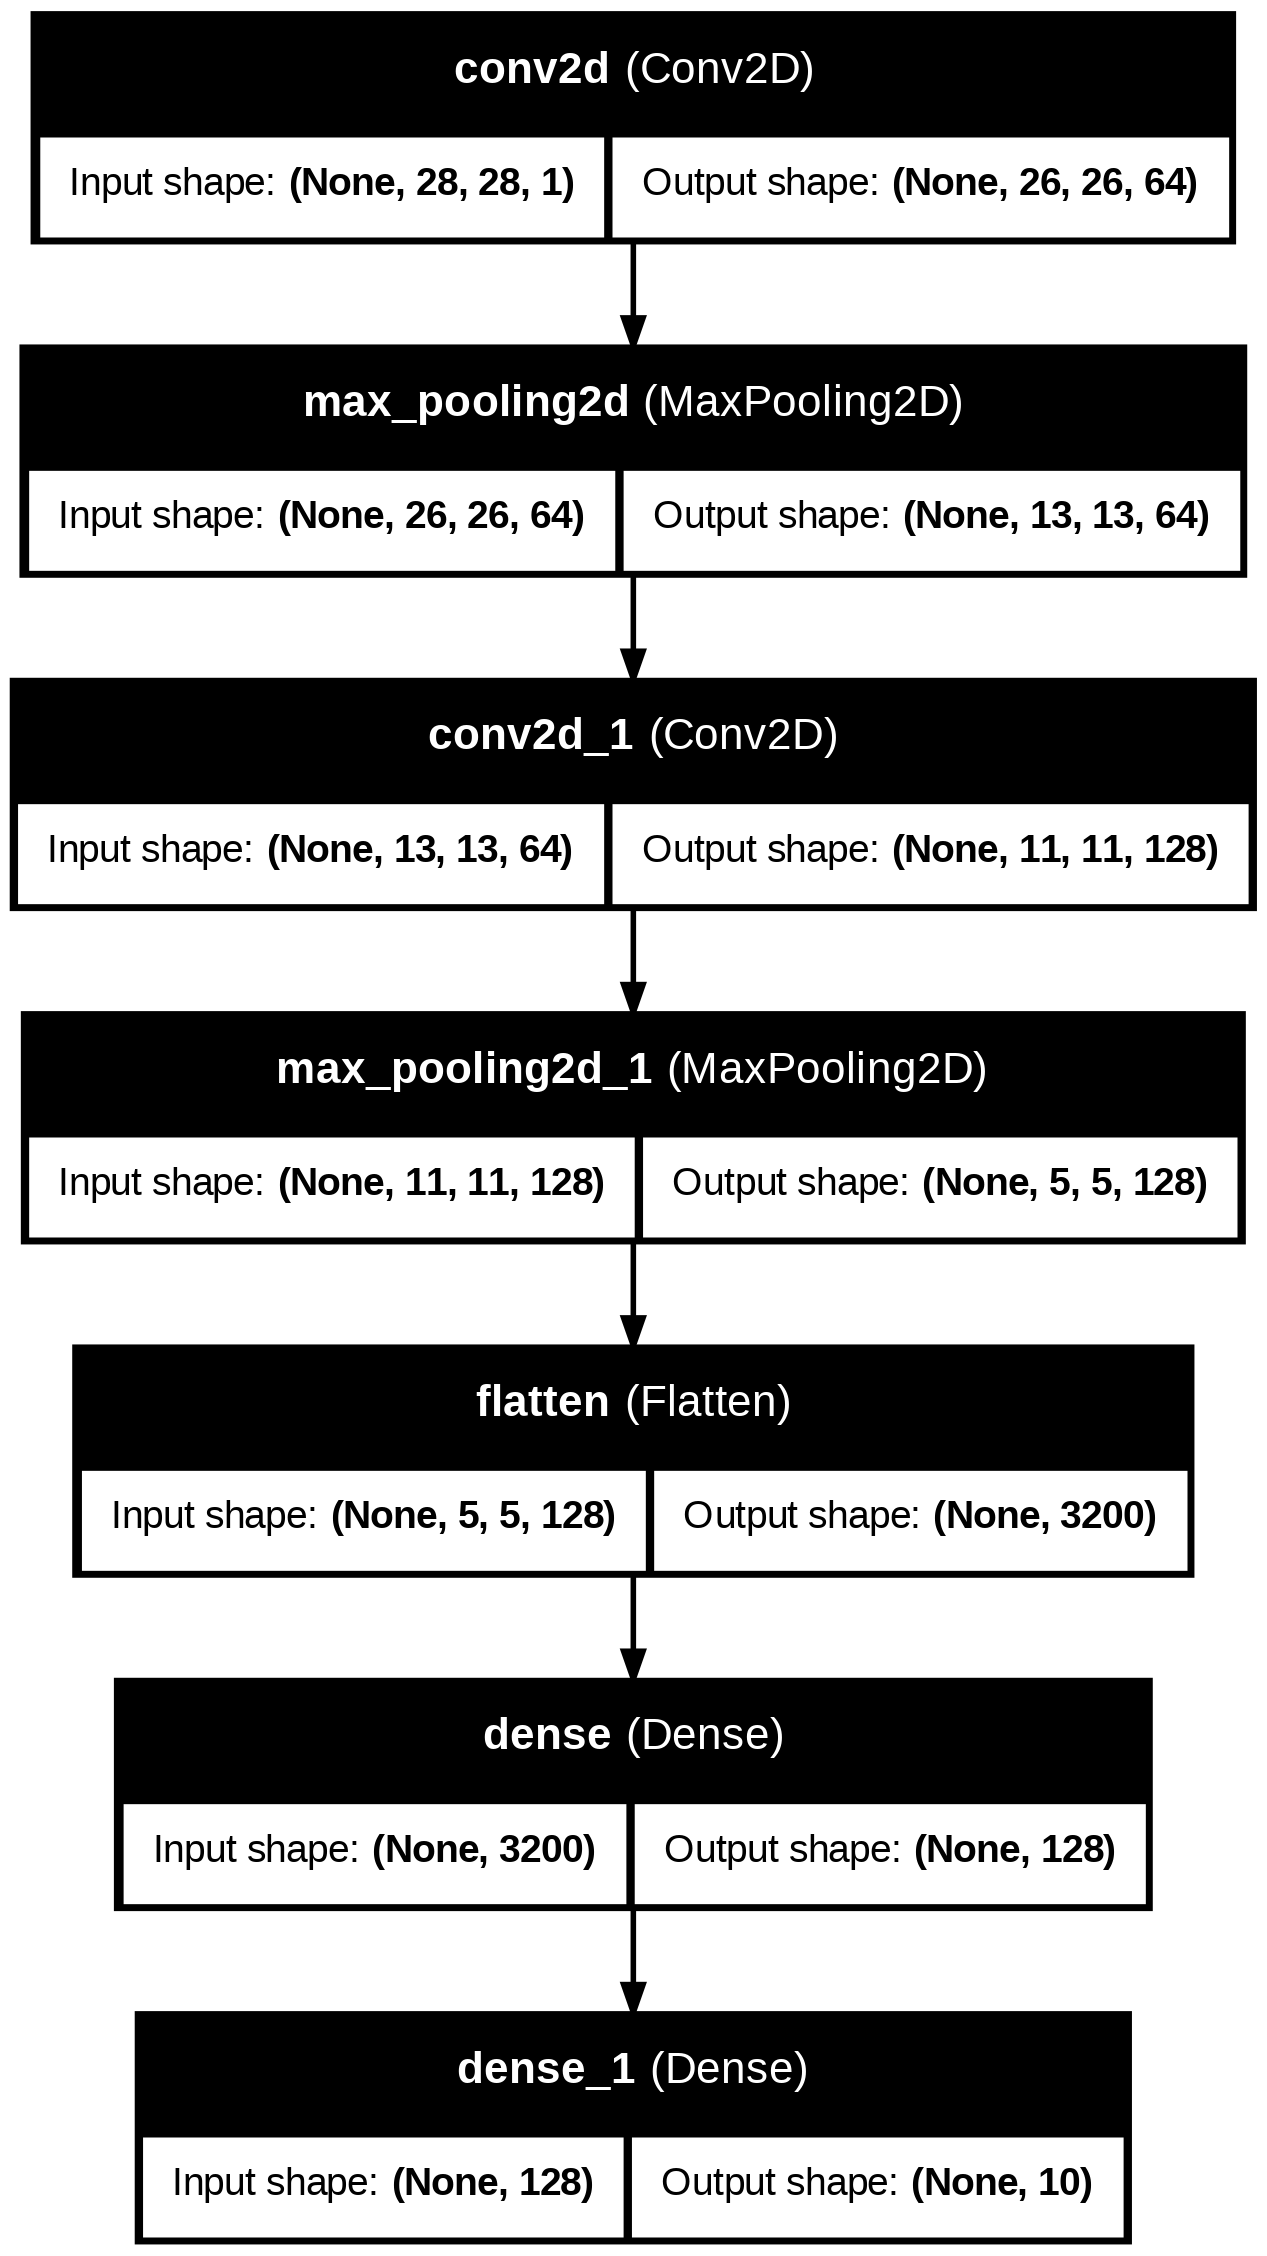

In [16]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True, show_layer_names=True)
# Image(filename='convnet.png')

In [17]:
# Finally we must configure the model for training

'''
optimizer='adam'—The optimizer this model will use to adjust the weights throughout
  the neural network as it learns. There are many optimizers59— 'adam' performs
  well across a wide variety of models.

loss='categorical_crossentropy'—This is the loss function used by the optimizer in multi-classification
  networks like our convnet, which will predict 10 classes. As the neural network learns, the
  optimizer attempts to minimize the values returned by the loss function.
  The lower the loss, the better the neural network is at predicting what each image is.
  For binary classification (which we’ll use later in this chapter), Keras
  provides 'binary_crossentropy', and for regression, 'mean_squared_error'.

metrics=['accuracy']—This is a list of the metrics that the network will produce to help
  you evaluate the model. Accuracy is a commonly used metric in classification models.
  In this example, we’ll use the accuracy metric to check the percentage of correct predictions.
'''

cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [18]:
# Fitting the model
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.8639 - loss: 3.2304 - val_accuracy: 0.9823 - val_loss: 0.0617
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9824 - loss: 0.0526 - val_accuracy: 0.9862 - val_loss: 0.0490
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9881 - loss: 0.0368 - val_accuracy: 0.9865 - val_loss: 0.0491
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9904 - loss: 0.0296 - val_accuracy: 0.9848 - val_loss: 0.0541
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9908 - loss: 0.0285 - val_accuracy: 0.9837 - val_loss: 0.0594


In [19]:
loss, accuracy = cnn.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9794 - loss: 0.0765


In [20]:
predictions = cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [21]:
print(f"y_test[0]: {y_test[0]} (Representing a 7)\n")
for index, probability in enumerate(predictions[0]):
  print(f'{index}: {probability:.10%}')

y_test[0]: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] (Representing a 7)

0: 0.0000003760%
1: 0.0000000000%
2: 0.0000003981%
3: 0.0000025661%
4: 0.0000000000%
5: 0.0000000029%
6: 0.0000000021%
7: 99.9997258186%
8: 0.0000023310%
9: 0.0002795149%


In [22]:
# Finding incorrect predictions

images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)
    if predicted != expected:
      incorrect_predictions.append((i, images[i], predicted, expected))

len(incorrect_predictions)

167

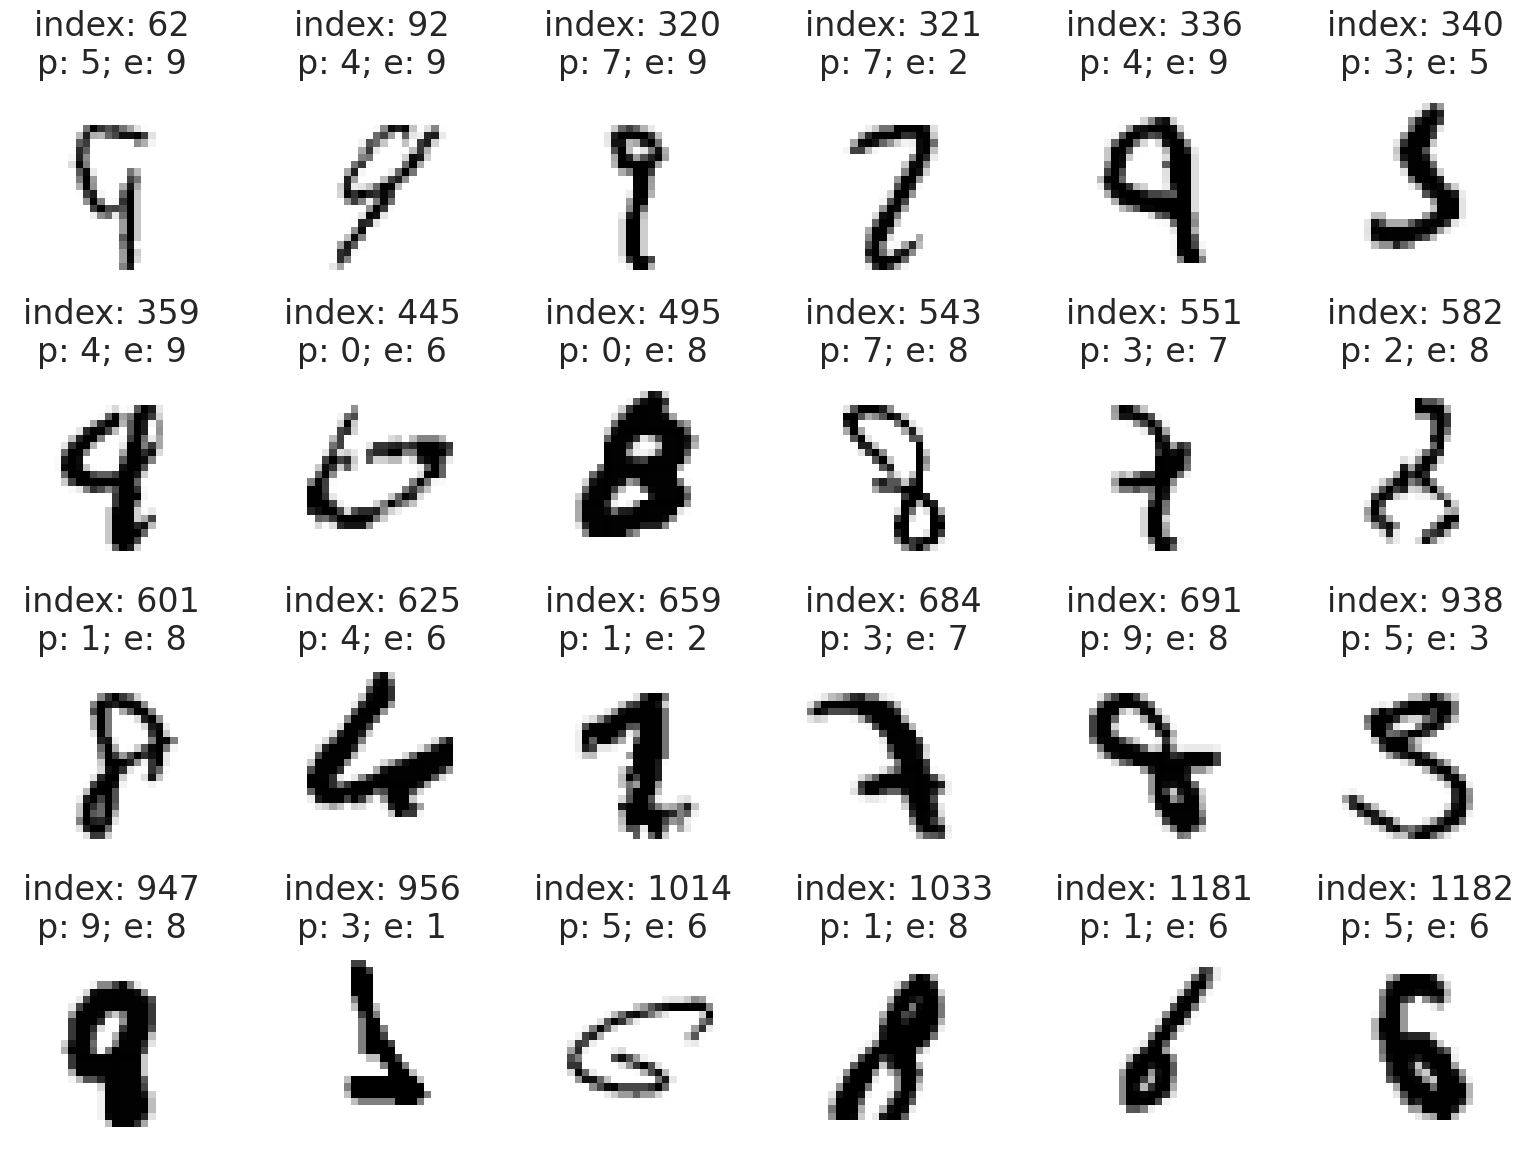

In [23]:
# Visualizing the incorrect predictions

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')

plt.tight_layout()

In [24]:
# Function for displaying an incorrect predictions data
def display_probabilities(prediction):
  for index, probability in enumerate(prediction):
      print(f'{index}: {probability:.10%}')

In [25]:
display_probabilities(predictions[55])

0: 100.0000000000%
1: 0.0000001371%
2: 0.0000000740%
3: 0.0000000000%
4: 0.0000000000%
5: 0.0000000016%
6: 0.0000000046%
7: 0.0000000402%
8: 0.0000039047%
9: 0.0000001528%


In [26]:
# Implementing previously trained models
cnn.save('mnist_cnn.keras')

In [27]:
from tensorflow.keras.models import load_model
cnn = load_model('mnist_cnn.keras')

# Recurrnet Neural Networks for Sequences

In [1]:
from tensorflow.keras.datasets import imdb

number_of_words = 10_000 # They recommended 10,000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=number_of_words)
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

X_train: (25000,)
y_train: (25000,)
X_test: (25000,)
y_test: (25000,)


In [2]:
# Decoding a review
word_to_index = imdb.get_word_index()

In [3]:
index_to_word = {index: word for (word, index) in word_to_index.items()}

In [4]:
[index_to_word[i] for i in range(1, 51)]

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'br',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'for',
 'with',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'he',
 'be',
 'one',
 'all',
 'at',
 'by',
 'an',
 'they',
 'who',
 'so',
 'from',
 'like',
 'her',
 'or',
 'just',
 'about',
 "it's",
 'out',
 'has',
 'if',
 'some',
 'there',
 'what',
 'good',
 'more']

In [5]:
' '.join([index_to_word.get(i - 3, '?') for i in X_train[123]])

'? beautiful and touching movie rich colors great settings good acting and one of the most charming movies i have seen in a while i never saw such an interesting setting when i was in china my wife liked it so much she asked me to ? on and rate it so other would enjoy too'

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

words_per_review = 200
X_train = pad_sequences(X_train, maxlen=words_per_review)
X_test = pad_sequences(X_test, maxlen=words_per_review)
# X_train.shape

In [14]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, random_state=11, test_size=0.20)

In [15]:
# Finally we can create the neural network
from tensorflow.keras.models import Sequential

rnn = Sequential()

In [16]:
# Import the layers we will use in this model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.layers import Embedding

In [17]:
# Adding a layer to reduce the dimensionality of our data
rnn.add(Embedding(input_dim=number_of_words, output_dim=128))

In [18]:
# Adding the LSTM layer
rnn.add(LSTM(units=128, dropout=0.2, recurrent_dropout=0.2))

In [19]:
# Adding a Dense Output layer - converts the LSTM to a binary output for classification
rnn.add(Dense(units=1, activation='sigmoid'))

In [20]:
# Compile the model
rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
rnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Training the model
rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 550s 693ms/step - accuracy: 0.7178 - loss: 0.5417 - val_accuracy: 0.8052 - val_loss: 0.4799
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 557s 692ms/step - accuracy: 0.8607 - loss: 0.3397 - val_accuracy: 0.8420 - val_loss: 0.3856
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 588s 725ms/step - accuracy: 0.8861 - loss: 0.2846 - val_accuracy: 0.8311 - val_loss: 0.4206
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 625s 729ms/step - accuracy: 0.9041 - loss: 0.2534 - val_accuracy: 0.8577 - val_loss: 0.3813
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 617s 722ms/step - accuracy: 0.9347 - loss: 0.1765 - val_accuracy: 0.8558 - val_loss: 0.3679
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 616s 714ms/step - accuracy: 0.9481 - loss: 0.1434 - val_accuracy: 0.8547 - val_loss: 0.4212
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 556s 712ms/step - accuracy: 0.9618 - loss: 0.1043 - val_accuracy: 0.8429 - val_loss: 0.4985
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 551s 705ms/step - accuracy: 0.9729 -

In [23]:
results = rnn.evaluate(X_test, y_test)

500/500 ━━━━━━━━━━━━━━━━━━━━ 60s 120ms/step - accuracy: 0.8418 - loss: 0.6528


In [24]:
results

[0.635323166847229, 0.847000002861023]